### Tip
* 기존 데이터에 로그를 취한다(데이터가 시간이 지날수록 진폭이 커지는 개형이기 때문)
* 로그를 취한 데이터를 바탕으로 예측하여 다시 제곱을 취한다.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [0]:
# Stationary를 검증하는 함수 생성

def adf_check(ts):
    result = adfuller(ts)
    if result[1] <= 0.05:
        print('Stationary {}'.format(result[1]))
    else:
        print('Non-Stationary {}'.format(result[1]))

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
# 데이터 불러오기

souvenir_sales_amount = pd.read_csv("/gdrive/My Drive/전산통계/homework/fancy.dat.txt",names=['souvenir sales amount'])

In [0]:
souvenir_sales_amount.head()

,souvenir sales amount
0,1664.81
1,2397.53
2,2840.71
3,3547.29
4,3752.96


In [0]:
# 데이터에 해당하는 날짜 생성

month = pd.date_range("1987-1", "1993-12", freq="MS")

In [0]:
month

DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01', '1987-11-01', '1987-12-01',
               '1988-01-01', '1988-02-01', '1988-03-01', '1988-04-01',
               '1988-05-01', '1988-06-01', '1988-07-01', '1988-08-01',
               '1988-09-01', '1988-10-01', '1988-11-01', '1988-12-01',
               '1989-01-01', '1989-02-01', '1989-03-01', '1989-04-01',
               '1989-05-01', '1989-06-01', '1989-07-01', '1989-08-01',
               '1989-09-01', '1989-10-01', '1989-11-01', '1989-12-01',
               '1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01', '1990-11-01', '1990-12-01',
               '1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
      

In [0]:
# 날짜를 인덱스로 지정

souvenir_sales_amount['month'] = month
souvenir_sales_amount.set_index('month', inplace=True)

In [0]:
souvenir_sales_amount.head()

,souvenir sales amount
month,
1987-01-01,1664.81
1987-02-01,2397.53
1987-03-01,2840.71
1987-04-01,3547.29
1987-05-01,3752.96


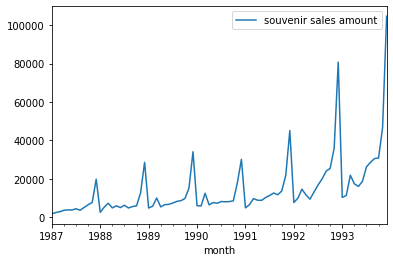

In [0]:
# 데이터 확인

souvenir_sales_amount.plot()
plt.show()

In [0]:
timeseries = souvenir_sales_amount['souvenir sales amount']
timeseries_resamp_yr = timeseries.resample('A').mean() # 12개월씩의 평균
timeseries_roll_yr = timeseries.rolling(12).mean() # 12개월 이동평균

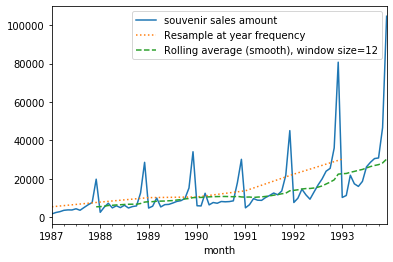

In [0]:
timeseries.plot(style='-')
timeseries_resamp_yr.plot(style=':',label = 'Resample at year frequency')
timeseries_roll_yr.plot(style='--', label='Rolling average (smooth), window size=12')
plt.legend()

In [0]:
# 데이터가 시간이 지날수록 진폭이 커지는 개형이기 때문에 데이터에 로그를 적용한다.
souvenir_sales_amount['souvenir sales amount'] = np.sqrt(souvenir_sales_amount['souvenir sales amount'])

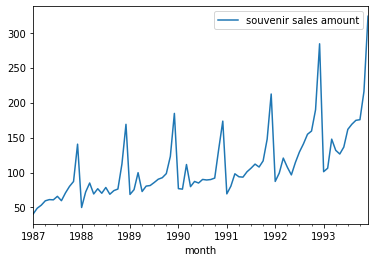

In [0]:
souvenir_sales_amount.plot()
plt.show()

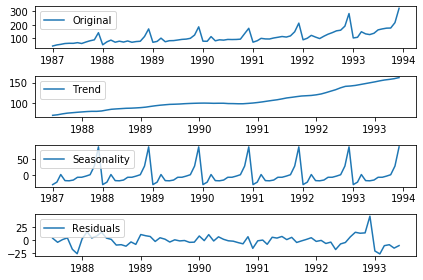

In [0]:
# 데이터의 개형을 통해 Non-Stationary 데이터라는 것을 확인할 수 있고
# Trend와 Seasonality를 동시에 가지고 있음을 짐작할 수 있다.

decomposition = seasonal_decompose(souvenir_sales_amount['souvenir sales amount'])
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(souvenir_sales_amount['souvenir sales amount'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0.5, 0, 'Year')

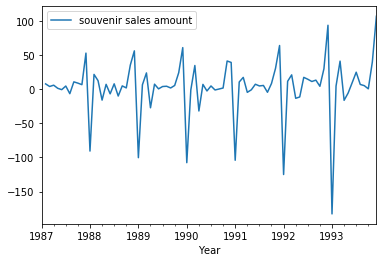

In [0]:
# 1차 차분(s=1)

y1 = souvenir_sales_amount.diff()
y1.plot()
plt.xlabel('Year')

Text(0.5, 0, 'Year')

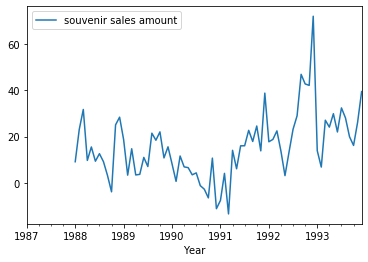

In [0]:
# 1차 차분(s=12)

y12 = souvenir_sales_amount.diff(12)
y12.plot()
plt.xlabel('Year')

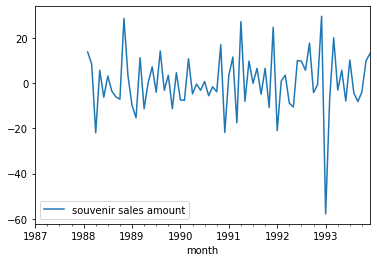

In [0]:
# 2차 차분(s1=1, s2=12)

y1_12 = y1.diff(12)
y1_12.plot()

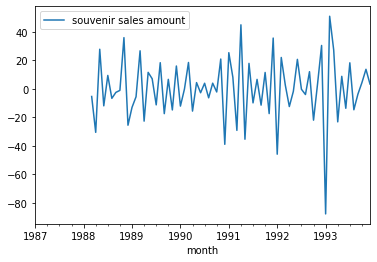

In [0]:
# 3차 차분(s1=1, s2=1, s3=12)

y1_1 = y1.diff()
y1_1_12 = y1_1.diff(12)
y1_1_12.plot()

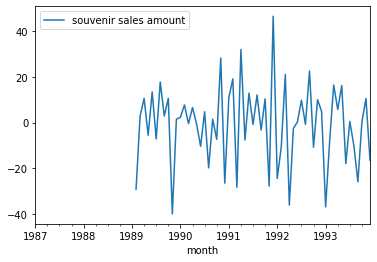

In [0]:
# 3차 차분(s1=1, s2=12, s3=12)

y1_12_12 = y1_12.diff(12)
y1_12_12.plot()

데이터의 개형만으로 차분한 데이터의 Stationary를 판단하기가 어렵다. 따라서 Stationary를 판단하는 adf_check함수를 생성하여 이를 통해 판단하기로 한다.

In [0]:
adf_check(y1['souvenir sales amount'].dropna()) # Non-Stationary

Non-Stationary 0.19201511553401895


In [0]:
adf_check(y12['souvenir sales amount'].dropna()) # Stationary

Stationary 0.041109156348258395


In [0]:
adf_check(y1_12['souvenir sales amount'].dropna()) # Stationary

Stationary 2.8371274381577685e-14


In [0]:
adf_check(y1_1_12['souvenir sales amount'].dropna()) # Stationary

Stationary 8.779569492392704e-09


In [0]:
adf_check(y1_12_12['souvenir sales amount'].dropna()) # Stationary

Stationary 1.9095386512342995e-22


앞에서 정의한 5가지 방법의 차분 중에서 2차 차분(s=1, s=12)을 한 데이터가 Stationary하다고 보이기 때문에 이를 선택하기로 한다. 즉, d=1, D=1이다.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:              souvenir sales amount   No. Observations:                   72
Model:             SARIMAX(0, 1, 5)x(0, 1, 1, 12)   Log Likelihood                -222.151
Date:                            Mon, 18 Nov 2019   AIC                            458.301
Time:                                    16:08:45   BIC                            472.844
Sample:                                01-01-1987   HQIC                           463.978
                                     - 12-01-1992                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5287      0.157     -3.366      0.001      -0.837      -0.221
ma.L2          0.0872      0.205   

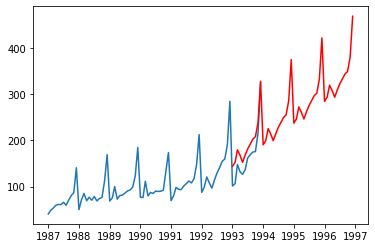

In [0]:
# (p,d,q)(P,D,Q)m = (0,1,5)(0,1,1,12)로 가정

y_train = souvenir_sales_amount[:'1992-12-01']
y_test = souvenir_sales_amount['1993-01-01':]

model = SARIMAX(y_train, order=(0,1,5), seasonal_order=(0,1,1,12))
results = model.fit()
print(results.summary())

plt.plot(souvenir_sales_amount['souvenir sales amount'])
plt.plot(results.forecast(48), color='red')

In [0]:
# 로그를 취한 데이터를 바탕으로 예측했기 때문에 다시 제곱을 취한다.

(results.forecast(48))**2

1993-01-01     20659.222354
1993-02-01     23221.547357
1993-03-01     32133.994720
1993-04-01     28057.170929
1993-05-01     23175.843875
1993-06-01     28237.210090
1993-07-01     32893.368737
1993-08-01     36820.522245
1993-09-01     41093.265831
1993-10-01     43213.433022
1993-11-01     56960.227706
1993-12-01    107176.457103
1994-01-01     36159.900427
1994-02-01     39717.805760
1994-03-01     50723.374059
1994-04-01     45528.300764
1994-05-01     39661.043913
1994-06-01     46205.210511
1994-07-01     52111.736825
1994-08-01     57026.111096
1994-09-01     62314.838295
1994-10-01     64919.509073
1994-11-01     81554.840432
1994-12-01    140095.113591
1995-01-01     56203.241871
1995-02-01     60618.343603
1995-03-01     74056.459375
1995-04-01     67749.988518
1995-05-01     60548.214946
1995-06-01     68575.181927
1995-07-01     75732.075908
1995-08-01     81633.670941
1995-09-01     87938.381754
1995-10-01     91027.556120
1995-11-01    110551.424154
1995-12-01    177415